### Problem Description

this dataset contains the information about transactions and it contians the attributes of each transaction such as the unit price and date and invoice number and other usful attributes and our aim is to analyze this data to answer some questions and perform some tasks that will help us in the analysis process which are :
- Which Country makes the most transactions?
- Show the Top 10 Customers how made the largest Revenue
- Show Top 5 frequent Customers
- Create a histogram that reveals the count of words of Description 
- Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒   feature
- Calculate the Total Revenue for each Row
- Aggregate Revenue & Quantity across the grouped_features


## Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [2]:
df = pd.read_csv("../input/ecommerce-data/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [4]:
missing_percentage = (df.isnull().sum()/df.shape[0])*100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
df.dropna(subset=['CustomerID'],inplace = True)
df.reset_index(drop=True, inplace=True)

In [6]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


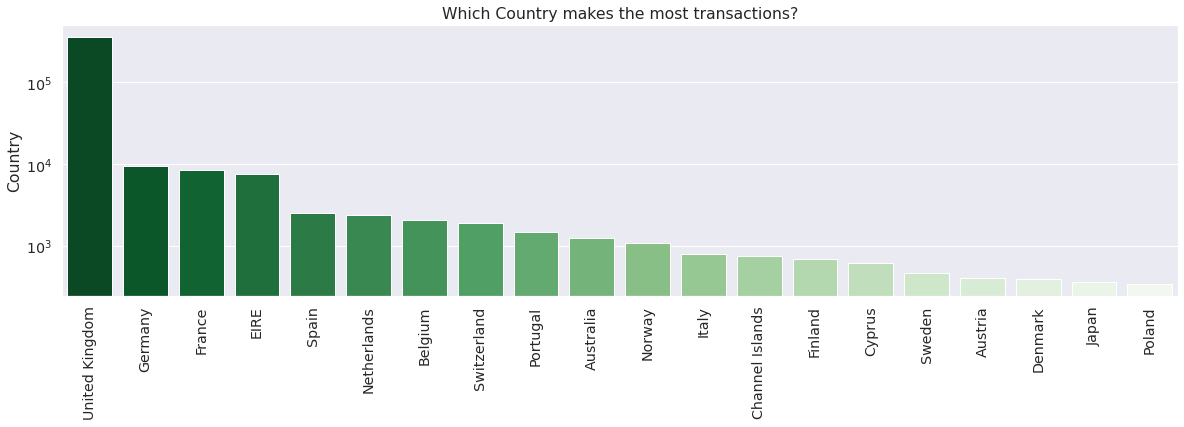

In [7]:
plt.figure(figsize=(20,5))

country_counts=df.Country.value_counts().sort_values(ascending=False)[:20]

sns.barplot(country_counts.index, country_counts, palette="Greens_r")

#first of all we will make a title to the resulted barplot
plt.title('Which Country makes the most transactions?')

#we will rotate the x axis text
plt.xticks(rotation=90);

# we will make the scale of y -axis log scale to respond to skewness towards large values 
plt.yscale("log")



**United Kingdom is the country which makes the most transactions**

### Q2: Show the Top 10 Customers how made the largest Revenue


### Q6: Calculate the Total Revenue for each Row

In [8]:
df['Revenue'] = df['Quantity'] *df['UnitPrice']
df_top_10 =df.groupby('CustomerID')['Revenue'].sum().sort_values( ascending = False)[:10].reset_index()
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [9]:
df_top_cust = df.CustomerID.value_counts()[:5].reset_index()
df_top_cust

,index,CustomerID
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [10]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

In [11]:
c=[]
for i in range(df.shape[0]):
    c.append(len(df.Description[i]))
desc_ser=pd.Series(c)    

Text(0.5, 0, 'DescriptionLength')

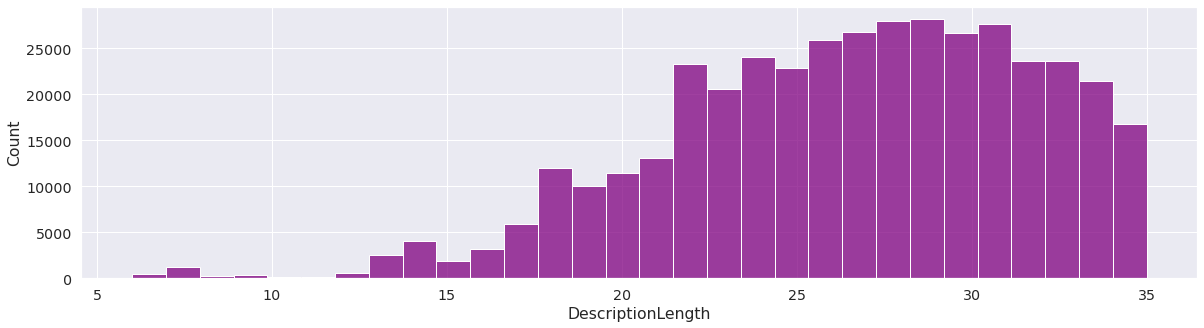

In [14]:
plt.figure(figsize=(20,5))
sns.histplot(desc_ser, color="Purple",bins=30)
plt.xlabel('DescriptionLength')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'DescriptionLength')

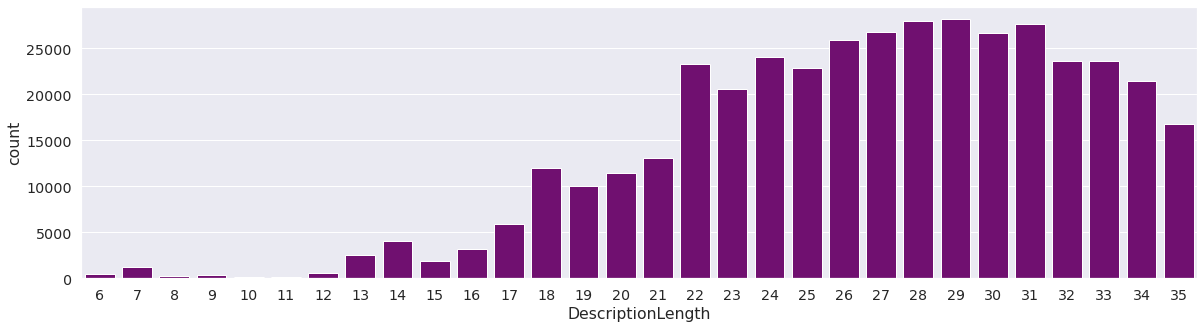

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(desc_ser, color="Purple")
plt.xlabel('DescriptionLength')

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [15]:
df["Year"] =df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] =df.InvoiceDate.dt.month
df["Week"] =df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] =df.InvoiceDate.dt.day_of_year
df["Date"] = df.InvoiceDate.dt.date

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [17]:
grouped_features = [ 'Date','Year', 'Quarter','Month', 'Week', 'Weekday', 'Day', 'Dayofyear','StockCode']

In [18]:
df_ = pd.DataFrame(df.groupby(grouped_features)['Quantity','Revenue'].sum(),columns=["Quantity","Revenue"]).reset_index()
df_.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,1,335,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,1,335,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,1,335,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,1,335,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,1,335,15056BL,20,113.00
